#### Updating data

In [1]:
from utilities import *
from Guardian import *

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)

In [2]:
data = guardianScraper()

data.to_csv(PARENT_DIR + "/data/Guardian.csv", index=True)

-> CSV file found with 2938 articles! Latest article date: 2022-07-19
-> Checking articles from latest date onward...
-> API Query |████████████████████████████████████████| (!) 19 in 4.0s (4.78/s) 
-> 15 new articles saved to Guardian.csv! Total articles: 2953


In [3]:
data.head(1)

,URL,Title,Text
Date,,,
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...


#### LDA topic identification

In [4]:
doc_topic, topic_word, vocabulary = learn_topics(data, topicnum=30, vocabsize=10000, num_iter=2000) 

INFO:lda:n_documents: 2953
INFO:lda:vocab_size: 10000
INFO:lda:n_words: 1308248
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -15810928
INFO:lda:<100> log likelihood: -11210805
INFO:lda:<200> log likelihood: -11121536
INFO:lda:<300> log likelihood: -11089296
INFO:lda:<400> log likelihood: -11084859
INFO:lda:<500> log likelihood: -11077696
INFO:lda:<600> log likelihood: -11078500
INFO:lda:<700> log likelihood: -11069198
INFO:lda:<800> log likelihood: -11064159
INFO:lda:<900> log likelihood: -11062287
INFO:lda:<1000> log likelihood: -11055265
INFO:lda:<1100> log likelihood: -11049495
INFO:lda:<1200> log likelihood: -11046748
INFO:lda:<1300> log likelihood: -11044516
INFO:lda:<1400> log likelihood: -11040216
INFO:lda:<1500> log likelihood: -11039489
INFO:lda:<1600> log likelihood: -11039194
INFO:lda:<1700> log likelihood: -11033781
INFO:lda:<1800> log likelihood: -11032582
INFO:lda:<1900> log likelihood: -11024632
INFO:lda:<1999> log likelihood: -11021818


In [5]:
topics = []
for i in range(len(data)):
    topics.append(doc_topic[i].argmax())

In [6]:
for i in range(10):
    print(f"{data.iloc[i][1]} TOPIC: {doc_topic[i].argmax()}")

Nancy Pelosi’s Taiwan trip ‘not a good idea right now’, says Biden TOPIC: 3
EU imposes sanctions on Russian motorcycle club and pro-Putin actors TOPIC: 24
Dining across the divide: ‘He supports a new Heathrow runway – we should invest in trains’ TOPIC: 8
Russia-Ukraine war at a glance: what we know on day 148 of the invasion TOPIC: 18
Woodside and Santos reap bumper profits as Ukraine war drives energy prices higher TOPIC: 28
Russia may seek to occupy more territory in Ukraine, says foreign minister TOPIC: 22
‘They hunt us like stray cats’: pro-Russia separatists step up forced conscription as losses mount TOPIC: 20
EU adopts Ukrainian art exhibition left stranded in Denmark TOPIC: 9
UK inflation rise is worrying but Bank of England must not overreact TOPIC: 28
Erdoğan keeps Putin waiting in awkward moment ahead of Tehran talks TOPIC: 10


In [7]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocabulary)[np.argsort(topic_dist)][:-8:-1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))


Topic 0: gas oil energy russian russia europe germany
Topic 1: russia said russian company the ukraine companies
Topic 2: city kyiv people russian the mariupol kharkiv
Topic 3: us china biden putin russia trump president
Topic 4: russian media said russia ukraine news the
Topic 5: uk johnson british minister the britain boris
Topic 6: she family said year children old home
Topic 7: the news film journalists march twitter ukraine
Topic 8: it we people like don he but
Topic 9: the ukraine ukrainian world russian music cultural
Topic 10: food ukraine grain world the turkey ports
Topic 11: ukraine russian military forces weapons us russia
Topic 12: russian putin war russia the ukraine soviet
Topic 13: the says university work guardian year research
Topic 14: sanctions russian russia the eu bank foreign
Topic 15: uk said refugees government visa the home
Topic 16: it but in time war and this
Topic 17: russia ukraine putin war nato the west
Topic 18: said russian ukrainian russia ukraine cit

In [8]:
source = "Guardian"
save_topicmodel(doc_topic, topic_word, vocabulary, source)

('/Users/r2/Code/ukraine-media/results/GuardianTopicMixtures.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianTopics.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianVocab.txt')

In [9]:
period = 7
novelties, transiences, resonances = novelty_transience_resonance(doc_topic, period)

for index in range(0,period):
    transiences.insert(0, 0)
    transiences.append(0)
    novelties.insert(0, 0)
    novelties.append(0)
    resonances.insert(0, 0)
    resonances.append(0)

save_novel_trans_reson(novelties, transiences, resonances, source)

/Users/r2/Code/ukraine-media/scrapers/utilities.py:142: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.savetxt(outpath, np.vstack(zip(novelties, transiences, resonances)))


In [10]:
ntr_data = data
ntr_data['Novelty'] = novelties
ntr_data['Transience'] = novelties
ntr_data['Resonance'] = resonances
ntr_data['Topic'] = topics

ntr_data.to_csv(PARENT_DIR + "/data/"+ source + "_ntr.csv")
ntr_data.head(5)

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...,0.0,0.0,0.0,3
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,EU imposes sanctions on Russian motorcycle clu...,"New EU sanctions hitting Russian gold, a major...",0.0,0.0,0.0,24
2022-07-21,https://www.theguardian.com/lifeandstyle/2022/...,Dining across the divide: ‘He supports a new H...,"Jasper, 26, London Occupation Architect Vot...",0.0,0.0,0.0,8
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,Russia-Ukraine war at a glance: what we know o...,The Russian Nord Stream 1 gas pipeline has re...,0.0,0.0,0.0,18
2022-07-21,https://www.theguardian.com/business/2022/jul/...,Woodside and Santos reap bumper profits as Ukr...,High energy prices due to Russia’s invasion of...,0.0,0.0,0.0,28


In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [12]:
ntr_data = pd.read_csv(PARENT_DIR + "/data/Guardian_ntr.csv", parse_dates=['Date'], index_col= ['Date'])
ntr_data.head()
#print(len(ntr_data))

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...,0.0,0.0,0.0,3
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,EU imposes sanctions on Russian motorcycle clu...,"New EU sanctions hitting Russian gold, a major...",0.0,0.0,0.0,24
2022-07-21,https://www.theguardian.com/lifeandstyle/2022/...,Dining across the divide: ‘He supports a new H...,"Jasper, 26, London Occupation Architect Vot...",0.0,0.0,0.0,8
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,Russia-Ukraine war at a glance: what we know o...,The Russian Nord Stream 1 gas pipeline has re...,0.0,0.0,0.0,18
2022-07-21,https://www.theguardian.com/business/2022/jul/...,Woodside and Santos reap bumper profits as Ukr...,High energy prices due to Russia’s invasion of...,0.0,0.0,0.0,28


In [17]:
davg = ntr_data.resample('D').mean()
davg.head()

,Novelty,Transience,Resonance,Topic
Date,,,,
2022-02-01,0.220221,0.220221,-0.166025,18.375
2022-02-02,2.102657,2.102657,-0.161065,19.800
2022-02-03,3.200643,3.200643,0.427742,18.250
2022-02-04,3.737186,3.737186,-0.195843,23.750
2022-02-05,1.839263,1.839263,-0.971079,22.000


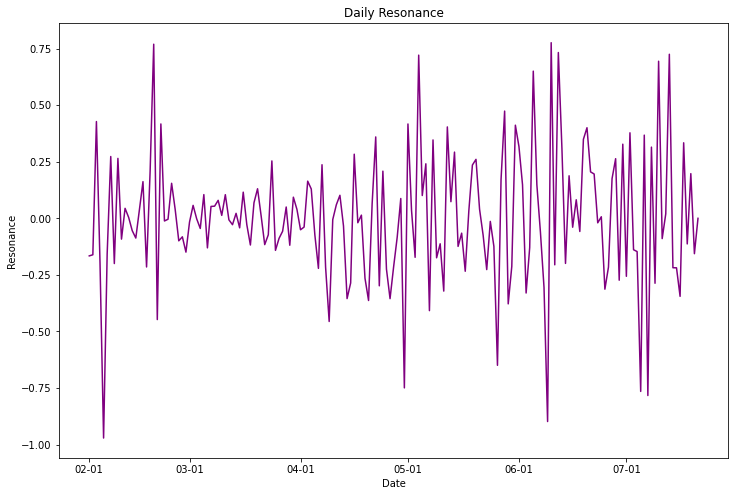

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(davg.index.values,
       davg['Resonance'],
       color='purple')

ax.set(xlabel="Date",
       ylabel="Resonance",
       title="Daily Resonance")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)